<a href="https://colab.research.google.com/github/satishgunjal/Machine-Learning-Using-Python/blob/master/13_K_Means_Clustering/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering
* K Means is unsupervised learning algorith. It is used to find the clusters of data in unlabelled data
* K = No of principal componenet or no of clusters

## How K Means Algorith works
* First steps is to randomly initialize two points and call them centroids
* No of centroids should be equal to no of clusters you want to predict
* Now in 'assignment steps'  K Means algorithm will go through each of the data points and depending on its closeness to the cluster it will assign the data points to a cluster.
* During 'assignment' if there is any centroid who has no data point associated with it, then it can be removed.
* Now in 'move' step  K means algorithm will find the mean of each data point assigned to the cluster centroid and move the respective centroid to the mean value location
* Now alogorith will keep doing the 'assigment' and 'move' steps till the convergance

## Choosing no of clusters (K)
* Mostly K value choosen mannually
* Elbow Method

## Problem Statement
* Find the clusters in given dataset. Datset conatins Name, Age and salaries columns


Import necessary libraries

In [0]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
#For local notebook
#df = pd.read_csv('income.csv')
#df

In [4]:
#For cloud Notebook like Google Colaboratory
from google.colab import files

uploaded =files.upload()

Saving income.csv to income.csv


In [7]:
import io

df = pd.read_csv(io.StringIO(uploaded['income.csv'].decode('utf-8')))
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Understanding the data
* We will ignore the name value and use age and income for our analysis
* Visualize the data by ploting scatter plot of age and income

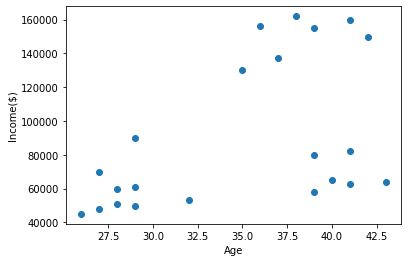

In [8]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df['Age'],df['Income($)']) 

We can cluster above data in 3 different clusters so K = 3

In [9]:
km =KMeans(n_clusters =3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Now lets use 'fit_predict' function to predict the K no of clusters for age and income data

In [13]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

So we got 0,1 and 2 as our three different clusters. 
Lets add the cluster column to our dataframe

In [16]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Now we got the dataset with cluster labels assigned.
Lets create separate dataframe for each cluster and plot a scatter plot

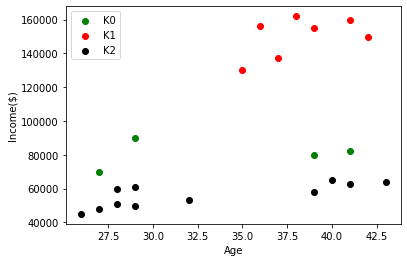

In [22]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

K0 = plt.scatter(df0['Age'],df0['Income($)'],color='green')
K1 = plt.scatter(df1['Age'],df1['Income($)'],color='red')
K2 = plt.scatter(df2['Age'],df2['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend([K0,K1,K2],['K0','K1','K2'])

* From above plot its clear that only K1 is correctly identified
* One of the possible reason for not getting correct cluster is order of mangitude of difference btween Age and Income.
* Lets use MinMaxScaler() for feature scaling. Feature scaling will convert the values of Age and income between the range of 0 to 1

In [25]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()          

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


Feature scaling dont affect the actual data, lets just plot the scater plot with scaled data to visualize it 

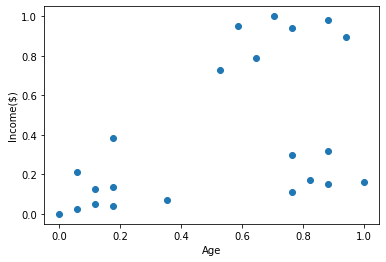

In [26]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df['Age'],df['Income($)']) 

* It matched exactly with our scatter plot in step: 8
* Now lets predict the clusters for our scaled data

In [27]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

So we got 0,1 and 2 as our three different clusters. Lets add the cluster column to our dataframe



In [28]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Now we got the scaled dataset with cluster labels assigned. Lets create separate dataframe for each cluster and plot a scatter plot

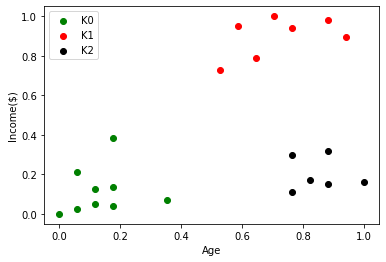

In [29]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

K0 = plt.scatter(df0['Age'],df0['Income($)'],color='green')
K1 = plt.scatter(df1['Age'],df1['Income($)'],color='red')
K2 = plt.scatter(df2['Age'],df2['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend([K0,K1,K2],['K0','K1','K2'])

We can also get the cluster centroids locations

In [31]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

Lets plot them with above scatter plot

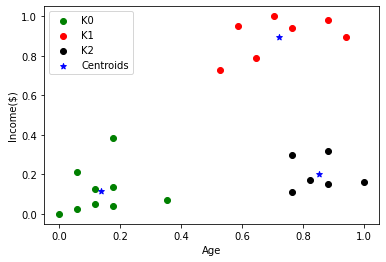

In [33]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

K0 = plt.scatter(df0['Age'],df0['Income($)'],color='green')
K1 = plt.scatter(df1['Age'],df1['Income($)'],color='red')
K2 = plt.scatter(df2['Age'],df2['Income($)'],color='black')
Centroids = plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='blue', marker='*')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend([K0,K1,K2,Centroids],['K0','K1','K2','Centroids'])

## Lets implement the ELbo plot to see the optimum K value

In [35]:
sse = [] # some of square error or cost functions
k_range= range(1,10) 
for k in k_range:
  km = KMeans(n_clusters = k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.26217927623452125,
 0.22020960864009392,
 0.16858512236029755,
 0.13781880133764024,
 0.10919063774844094]

Now we ahve the value of sse/cost function lets plot it

Text(0, 0.5, 'SSE/CostFunction')

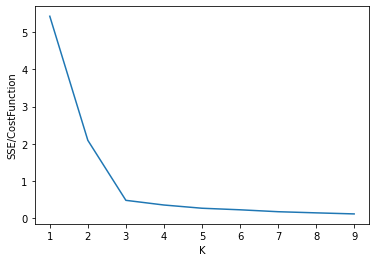

In [38]:
plt.plot(k_range,sse)
plt.xlabel('K')
plt.ylabel('SSE/CostFunction')

From ElbowPlot also we get 3 as best K value